In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NEW_API_kaggle.json to NEW_API_kaggle.json


In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy json file to folder
! cp NEW_API_kaggle.json ~/.kaggle/


In [ ]:
!mv /content/NEW_API_kaggle.json /root/.kaggle/kaggle.json

In [ ]:
#permission for JSON to act
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           8187        172  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           1709         25  1.0              
mexwell/heart-disease-dataset                                    🫀 Heart Disease Dataset                          399KB  2024-04-08 09:43:49           4180         73  1.0              
sujithmandala/second-hand-car-price-prediction                   Secon

In [ ]:
!kaggle datasets download -d landrykezebou/uot32-underwater-object-tracking-dataset

... resuming from 1686110208 bytes (1960455251 bytes left) ...
100% 3.39G/3.40G [00:41<00:00, 27.0MB/s]
100% 3.40G/3.40G [00:42<00:00, 46.7MB/s]


In [ ]:
!unzip uot32-underwater-object-tracking-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: SeaTurtle1/img/632.jpg  
  inflating: SeaTurtle1/img/633.jpg  
  inflating: SeaTurtle1/img/634.jpg  
  inflating: SeaTurtle1/img/635.jpg  
  inflating: SeaTurtle1/img/636.jpg  
  inflating: SeaTurtle1/img/637.jpg  
  inflating: SeaTurtle1/img/638.jpg  
  inflating: SeaTurtle1/img/639.jpg  
  inflating: SeaTurtle1/img/64.jpg   
  inflating: SeaTurtle1/img/640.jpg  
  inflating: SeaTurtle1/img/641.jpg  
  inflating: SeaTurtle1/img/642.jpg  
  inflating: SeaTurtle1/img/643.jpg  
  inflating: SeaTurtle1/img/644.jpg  
  inflating: SeaTurtle1/img/645.jpg  
  inflating: SeaTurtle1/img/646.jpg  
  inflating: SeaTurtle1/img/647.jpg  
  inflating: SeaTurtle1/img/648.jpg  
  inflating: SeaTurtle1/img/649.jpg  
  inflating: SeaTurtle1/img/65.jpg   
  inflating: SeaTurtle1/img/650.jpg  
  inflating: SeaTurtle1/img/651.jpg  
  inflating: SeaTurtle1/img/652.jpg  
  inflating: SeaTurtle1/img/653.jpg  
  inflating: SeaTurtle1/img/654.jpg  

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.1 MB/s eta 0:00:00


Epoch 1/10, Loss: 0.7818455696105957
Epoch 2/10, Loss: 0.7709747552871704
Epoch 3/10, Loss: 0.7655861377716064
Epoch 4/10, Loss: 0.761237382888794
Epoch 5/10, Loss: 0.7587641477584839
Epoch 6/10, Loss: 0.7571222186088562
Epoch 7/10, Loss: 0.7519228458404541
Epoch 8/10, Loss: 0.7552485466003418
Epoch 9/10, Loss: 0.7457053065299988
Epoch 10/10, Loss: 0.7491580843925476


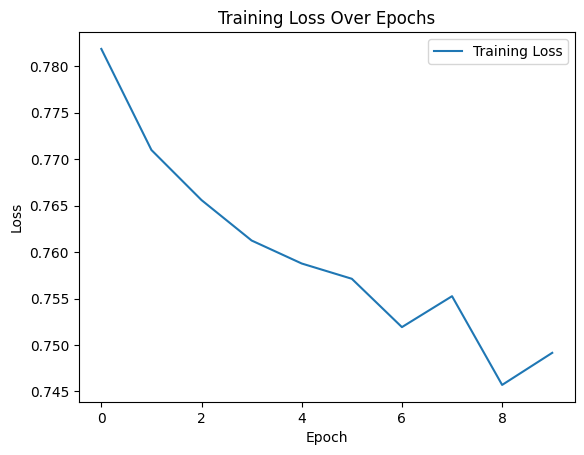

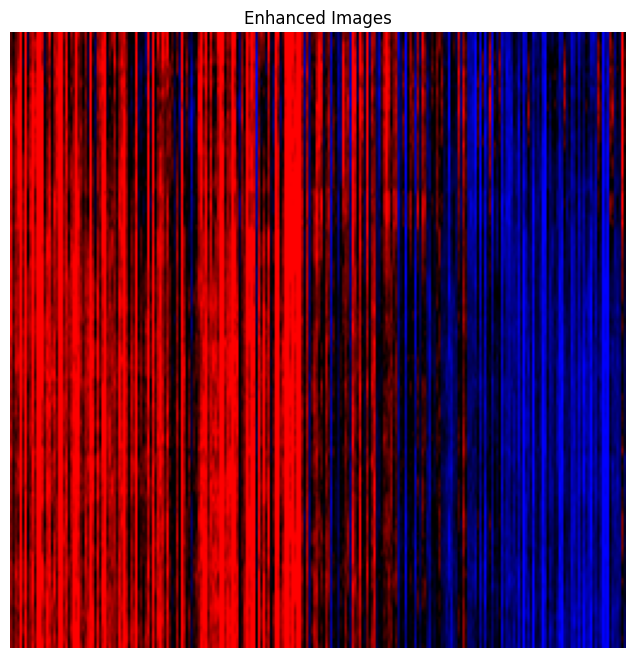

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the image enhancement model
class ImageEnhancementModel(nn.Module):
    def __init__(self):
        super(ImageEnhancementModel, self).__init__()
        self.transformer = nn.Transformer(d_model=256, nhead=8, num_encoder_layers=4, num_decoder_layers=4)
        self.conv = nn.Conv2d(3, 3, kernel_size=1)

    def forward(self, x):
        # Flatten input images
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size * channels, height, width)

        # Transformer forward pass
        x_transformed = self.transformer(x, x)

        # Reshape output
        x_transformed = x_transformed.view(batch_size, channels, height, width)

        # Apply convolution to enhance the image
        x_enhanced = self.conv(x_transformed)
        return x_enhanced

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

# Define a custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Load the dataset
image_paths = ["/content/Octopus1/img/1.jpg", "/content/Octopus1/img/2.jpg", "/content/Octopus1/img/3.jpg"]  # Update with your image paths
dataset = CustomImageDataset(image_paths, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Initialize the model
model = ImageEnhancementModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train the model
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

# Visualize training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Visualize some example results
with torch.no_grad():
    model.eval()
    for i, inputs in enumerate(dataloader):
        outputs = model(inputs)
        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title("Enhanced Images")
        enhanced_image = outputs[0].cpu().numpy().transpose(1, 2, 0)  # Transpose image data to correct format
        plt.imshow(enhanced_image)
        plt.show()
        break  # Show only the first batch of enhanced images


Train Epoch 1/10, Loss: 0.44627952575683594
Train Epoch 2/10, Loss: 0.42646196484565735
Train Epoch 3/10, Loss: 0.4211505651473999
Train Epoch 4/10, Loss: 0.41745567321777344
Train Epoch 5/10, Loss: 0.4146921932697296
Train Epoch 6/10, Loss: 0.4121130406856537
Train Epoch 7/10, Loss: 0.4099384844303131
Train Epoch 8/10, Loss: 0.4078482985496521
Train Epoch 9/10, Loss: 0.40602946281433105
Train Epoch 10/10, Loss: 0.40426144003868103
Test Loss: 0.32913267612457275


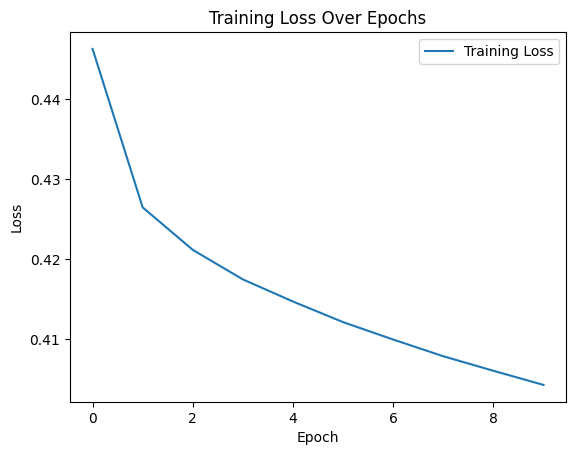

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the image enhancement model
class ImageEnhancementModel(nn.Module):
    def __init__(self):
        super(ImageEnhancementModel, self).__init__()
        self.transformer = nn.Transformer(d_model=256, nhead=8, num_encoder_layers=4, num_decoder_layers=4)
        self.conv = nn.Conv2d(3, 3, kernel_size=1)

    def forward(self, x):
        # Flatten input images
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size * channels, height, width)

        # Transformer forward pass
        x_transformed = self.transformer(x, x)

        # Reshape output
        x_transformed = x_transformed.view(batch_size, channels, height, width)

        # Apply convolution to enhance the image
        x_enhanced = self.conv(x_transformed)
        return x_enhanced

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

# Define a custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Load the dataset
train_image_paths = ["/content/WhaleAtBeach1/img/1.jpg", "/content/WhaleAtBeach1/img/10.jpg", "/content/WhaleAtBeach1/img/100.jpg"]  # Update with your image paths
test_image_paths = ["/content/WhaleAtBeach1/img/1002.jpg", "/content/WhaleAtBeach1/img/1006.jpg", "/content/WhaleAtBeach1/img/1008.jpg"]  # Update with your image paths

train_dataset = CustomImageDataset(train_image_paths, transform=transform)
test_dataset = CustomImageDataset(test_image_paths, transform=transform)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = ImageEnhancementModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train the model
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)
    print(f'Train Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

# Test the model
test_losses = []
with torch.no_grad():
    model.eval()
    for inputs in test_dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        test_losses.append(loss.item())

test_loss = np.mean(test_losses)
print(f'Test Loss: {test_loss}')

# Calculate accuracy (e.g., using SSIM or PSNR)

# Visualize training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Train Epoch 1/10, Loss: 0.7743812799453735
Test Epoch 1/10, Loss: 0.7013643383979797
Train Epoch 2/10, Loss: 0.7741415500640869
Test Epoch 2/10, Loss: 0.6996365785598755
Train Epoch 3/10, Loss: 0.7690401077270508
Test Epoch 3/10, Loss: 0.6983484625816345
Train Epoch 4/10, Loss: 0.7652416229248047
Test Epoch 4/10, Loss: 0.6967229843139648
Train Epoch 5/10, Loss: 0.761187732219696
Test Epoch 5/10, Loss: 0.698785126209259
Train Epoch 6/10, Loss: 0.7642089128494263
Test Epoch 6/10, Loss: 0.6946265697479248
Train Epoch 7/10, Loss: 0.7589011192321777
Test Epoch 7/10, Loss: 0.6919105052947998
Train Epoch 8/10, Loss: 0.7528712749481201
Test Epoch 8/10, Loss: 0.6948229074478149
Train Epoch 9/10, Loss: 0.7520703077316284
Test Epoch 9/10, Loss: 0.6916187405586243
Train Epoch 10/10, Loss: 0.7471358776092529
Test Epoch 10/10, Loss: 0.6905481815338135


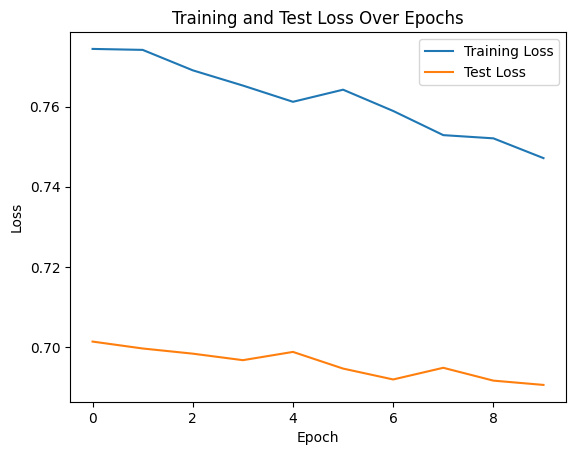

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Define the image enhancement model
class ImageEnhancementModel(nn.Module):
    def __init__(self):
        super(ImageEnhancementModel, self).__init__()
        self.transformer = nn.Transformer(d_model=256, nhead=8, num_encoder_layers=4, num_decoder_layers=4)
        self.conv = nn.Conv2d(3, 3, kernel_size=1)

    def forward(self, x):
        # Flatten input images
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size * channels, height, width)

        # Transformer forward pass
        x_transformed = self.transformer(x, x)

        # Reshape output
        x_transformed = x_transformed.view(batch_size, channels, height, width)

        # Apply convolution to enhance the image
        x_enhanced = self.conv(x_transformed)
        return x_enhanced

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

# Define a custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Load the dataset
train_image_paths = ["/content/WhaleAtBeach1/img/1.jpg", "/content/WhaleAtBeach1/img/10.jpg", "/content/WhaleAtBeach1/img/100.jpg"]  # Update with your image paths
test_image_paths = ["/content/WhaleAtBeach1/img/1002.jpg", "/content/WhaleAtBeach1/img/1006.jpg", "/content/WhaleAtBeach1/img/1008.jpg"]  # Update with your image paths

train_dataset = CustomImageDataset(train_image_paths, transform=transform)
test_dataset = CustomImageDataset(test_image_paths, transform=transform)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = ImageEnhancementModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train the model
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)
    print(f'Train Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

    # Test the model
    test_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            test_loss += loss.item()

    test_loss /= len(test_dataloader)
    test_losses.append(test_loss)
    print(f'Test Epoch {epoch+1}/{num_epochs}, Loss: {test_loss}')

# Visualize training and test loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()


Train Epoch 1/10, Loss: 0.4804697632789612


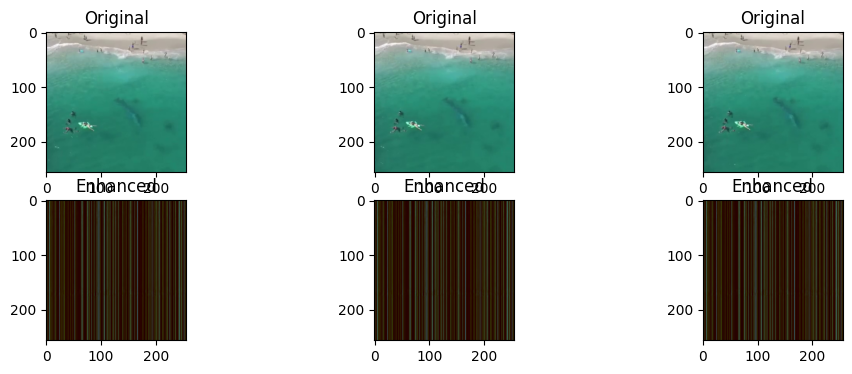

Test Epoch 1/10, Loss: 0.3305526673793793
Train Epoch 2/10, Loss: 0.43218493461608887


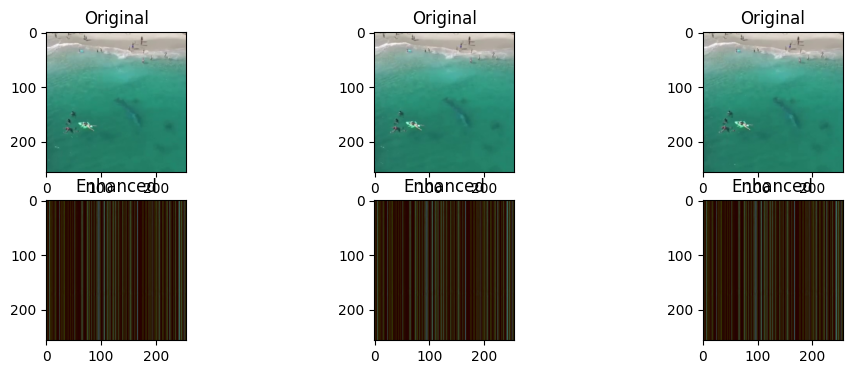

Test Epoch 2/10, Loss: 0.33006152510643005
Train Epoch 3/10, Loss: 0.43098413944244385


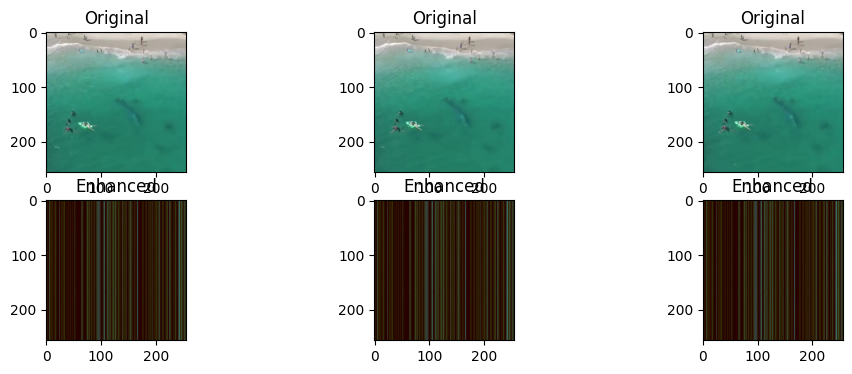

Test Epoch 3/10, Loss: 0.3295482397079468
Train Epoch 4/10, Loss: 0.42964693903923035


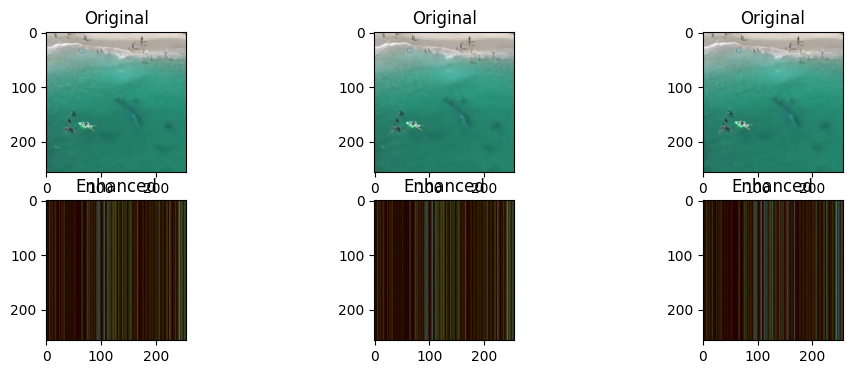

Test Epoch 4/10, Loss: 0.3290356397628784
Train Epoch 5/10, Loss: 0.428278386592865


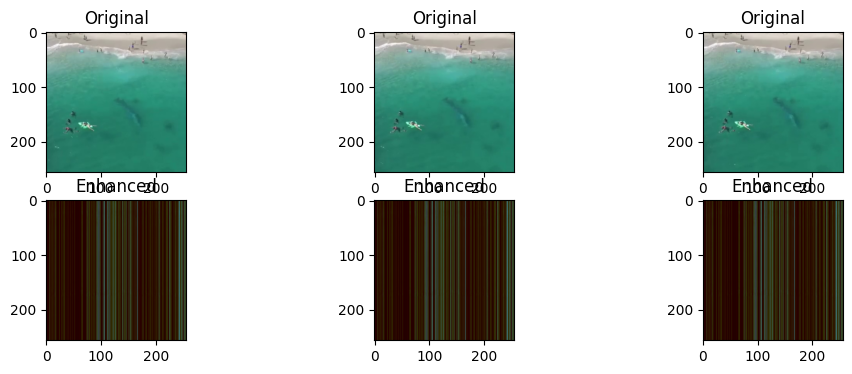

Test Epoch 5/10, Loss: 0.3285323977470398
Train Epoch 6/10, Loss: 0.42685461044311523


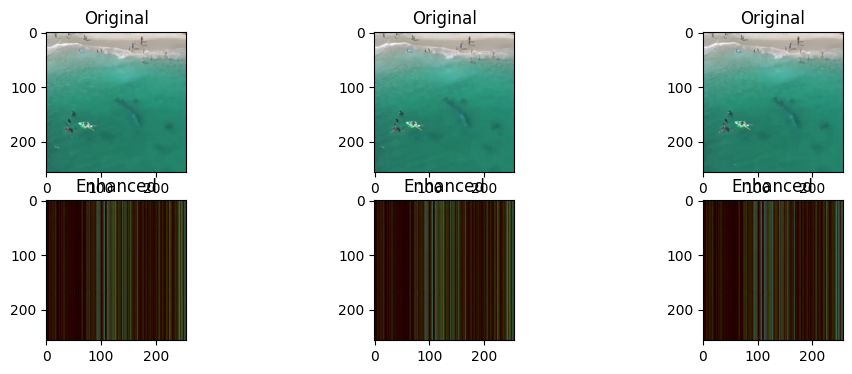

Test Epoch 6/10, Loss: 0.32802435755729675
Train Epoch 7/10, Loss: 0.4253910779953003


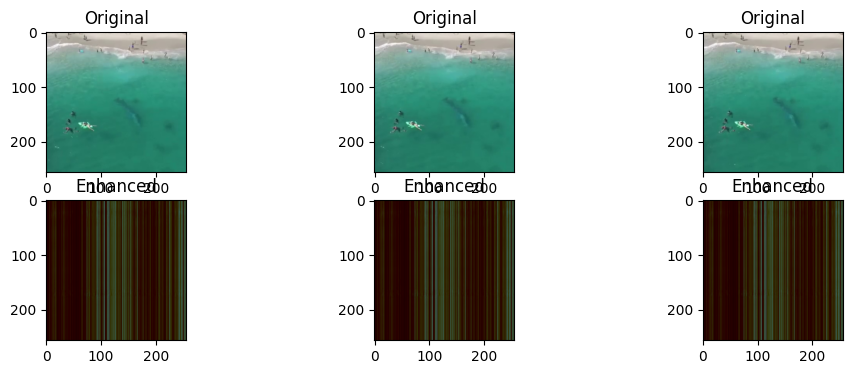

Test Epoch 7/10, Loss: 0.3275015652179718
Train Epoch 8/10, Loss: 0.4238322973251343


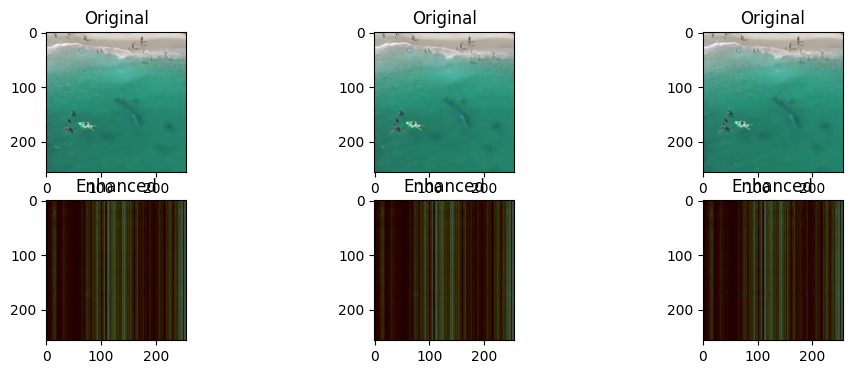

Test Epoch 8/10, Loss: 0.32692158222198486
Train Epoch 9/10, Loss: 0.42194992303848267


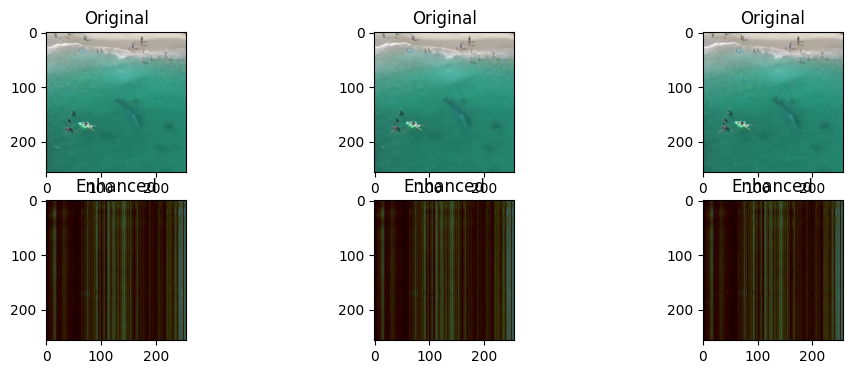

Test Epoch 9/10, Loss: 0.3262040317058563
Train Epoch 10/10, Loss: 0.4194639325141907


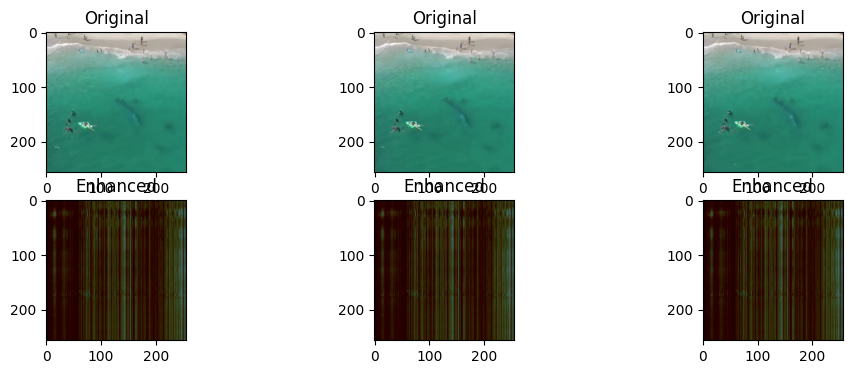

Test Epoch 10/10, Loss: 0.3255667984485626


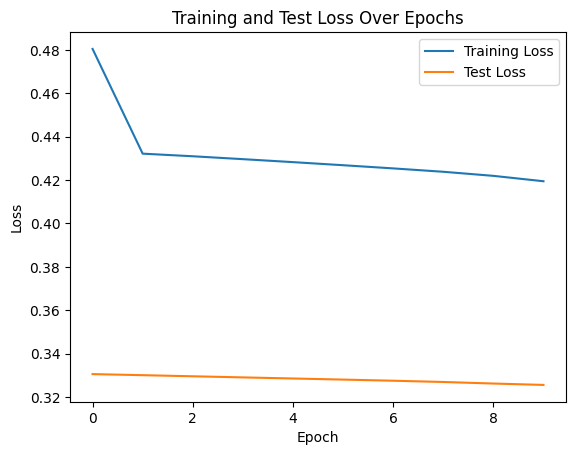

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


# Define the image enhancement model
class ImageEnhancementModel(nn.Module):
    def __init__(self):
        super(ImageEnhancementModel, self).__init__()
        self.transformer = nn.Transformer(d_model=256, nhead=8, num_encoder_layers=4, num_decoder_layers=4)
        self.conv = nn.Conv2d(3, 3, kernel_size=1)

    def forward(self, x):
        # Flatten input images
        batch_size, channels, height, width = x.size()
        x = x.view(batch_size * channels, height, width)

        # Transformer forward pass
        x_transformed = self.transformer(x, x)

        # Reshape output
        x_transformed = x_transformed.view(batch_size, channels, height, width)

        # Apply convolution to enhance the image
        x_enhanced = self.conv(x_transformed)
        return x_enhanced

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
])

# Define a custom dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Load the dataset
train_image_paths = ["/content/WhaleAtBeach1/img/1.jpg", "/content/WhaleAtBeach1/img/10.jpg", "/content/WhaleAtBeach1/img/100.jpg"]  # Update with your image paths
test_image_paths = ["/content/WhaleAtBeach1/img/1002.jpg", "/content/WhaleAtBeach1/img/1006.jpg", "/content/WhaleAtBeach1/img/1008.jpg"]  # Update with your image paths

train_dataset = CustomImageDataset(train_image_paths, transform=transform)
test_dataset = CustomImageDataset(test_image_paths, transform=transform)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize the model
model = ImageEnhancementModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Train the model
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)
    print(f'Train Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

    # Test the model
    test_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            test_loss += loss.item()

            # Visualize some original and enhanced images
            num_images_to_visualize = 3
            if num_images_to_visualize > 0:
                fig, axes = plt.subplots(2, num_images_to_visualize, figsize=(12, 4))
                for i in range(num_images_to_visualize):
                    original_image = inputs[i].permute(1, 2, 0).numpy()
                    enhanced_image = outputs[i].permute(1, 2, 0).numpy()
                    axes[0, i].imshow(original_image)
                    axes[0, i].set_title('Original')
                    axes[1, i].imshow(enhanced_image)
                    axes[1, i].set_title('Enhanced')
                plt.show()
                num_images_to_visualize = 0

    test_loss /= len(test_dataloader)
    test_losses.append(test_loss)
    print(f'Test Epoch {epoch+1}/{num_epochs}, Loss: {test_loss}')

# Visualize training and test loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()
